## Project Title: Fault Detection, Classification, and Location Estimation of Power Systems Using Artificial Neural Networks


### Aim: 
The Primary aim of the project is;
1. Fault Detection: Develop an ANN-based model to accurately detect the occurrence of faults in power systems.
2. Fault Classification: Implement an ANN to classify the type of fault based on the data collected during fault events.
3. Location Estimation: Utilize ANN techniques to estimate the location of faults within the power system, providing valuable information for quick and efficient maintenance.

### Project Outline
1. Data Collection (Data for detection and classification)
2. Data Exploration (The both datasets)
3. Data Visualizations 
    * Visualiizations for fault detection
    * Visualization for fault classification 
4. Data Modeling
    * Data Modeling for fault detection
        * LSTM
    * Data Modeling for Fault Type Categories
        * MLP
5. Model Evaluation
6. Information Communication and Business Insights 
7. Reporting 

## 1. Data Collection 

* Detection dataset
* Classification dataset

In [2]:
# Import of necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Loading the datasets

# Fault Detection dataset
def detect_data():
    detect_dataset = pd.read_csv("detect_dataset.csv")
    return detect_dataset

# Fault class dataset
def class_data():
    class_dataset = pd.read_csv("classData.csv")
    return class_dataset


In [4]:
# Showing a headview of the datasets

# detect dataset
print("Fault Detection Dataset")
print(detect_data().head(10))

# class dataset'
print("Class Dataset")
print(class_data().head(10))

Fault Detection Dataset
   Output (S)          Ia        Ib          Ic        Va        Vb        Vc  \
0           0 -170.472196  9.219613  161.252583  0.054490 -0.659921  0.605431   
1           0 -122.235754  6.168667  116.067087  0.102000 -0.628612  0.526202   
2           0  -90.161474  3.813632   86.347841  0.141026 -0.605277  0.464251   
3           0  -79.904916  2.398803   77.506112  0.156272 -0.602235  0.445963   
4           0  -63.885255  0.590667   63.294587  0.180451 -0.591501  0.411050   
5           0  -55.954681 -1.001882   56.956562  0.193414 -0.590695  0.397281   
6           0  -45.248446 -2.586980   47.835426  0.212393 -0.584136  0.371743   
7           0  -47.845420 -3.428094   51.273513  0.216396 -0.590123  0.373727   
8           0  -43.294259 -4.511300   47.805558  0.229748 -0.587588  0.357840   
9           0  -43.474722 -5.388233   48.862955  0.235733 -0.591320  0.355587   

   Unnamed: 7  Unnamed: 8  
0         NaN         NaN  
1         NaN         NaN  


## 2. Data Exploration 

* Detection EDA 

In [5]:
# cheacking for the general information about the dataset
detect_data().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12001 entries, 0 to 12000
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Output (S)  12001 non-null  int64  
 1   Ia          12001 non-null  float64
 2   Ib          12001 non-null  float64
 3   Ic          12001 non-null  float64
 4   Va          12001 non-null  float64
 5   Vb          12001 non-null  float64
 6   Vc          12001 non-null  float64
 7   Unnamed: 7  0 non-null      float64
 8   Unnamed: 8  0 non-null      float64
dtypes: float64(8), int64(1)
memory usage: 843.9 KB


#### Observation 1

* It is observed that the detect dataset have 12001 entries with 6 observed variables 
* The variables are integers and floats

In [6]:
# Checking for missing values 
detect_data().isna().sum()

Output (S)        0
Ia                0
Ib                0
Ic                0
Va                0
Vb                0
Vc                0
Unnamed: 7    12001
Unnamed: 8    12001
dtype: int64

#### Observation 2
* There are two empty columns which needs to be dropped.
* Aside the two columns there is no other missing value

In [7]:
detect_data().shape

(12001, 9)

* Dropping the empty columns

In [8]:
detect_df_clean = detect_data().drop(columns=["Unnamed: 7", "Unnamed: 8"], axis=1)

detect_df_clean.head()

,Output (S),Ia,Ib,Ic,Va,Vb,Vc
0,0,-170.472196,9.219613,161.252583,0.054490,-0.659921,0.605431
1,0,-122.235754,6.168667,116.067087,0.102000,-0.628612,0.526202
2,0,-90.161474,3.813632,86.347841,0.141026,-0.605277,0.464251
3,0,-79.904916,2.398803,77.506112,0.156272,-0.602235,0.445963
4,0,-63.885255,0.590667,63.294587,0.180451,-0.591501,0.411050


* The empty columns have been dropped.

In [9]:
# Checking for missing values 
detect_df_clean.isna().sum()

Output (S)    0
Ia            0
Ib            0
Ic            0
Va            0
Vb            0
Vc            0
dtype: int64

* There is no missing value

## 4. Data Visualization 

* Visualization for the detect dataset

In [10]:
plt.style.use('ggplot')

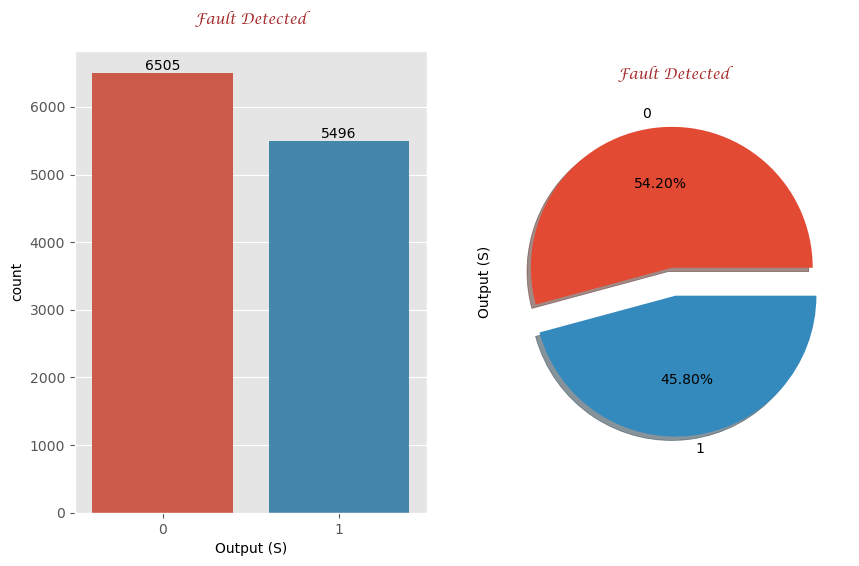

In [11]:
plt.figure(figsize=(10, 6))

ax = plt.subplot(1,2,1)
ax = sns.countplot(x='Output (S)', data=detect_df_clean)
ax.bar_label(ax.containers[0])
plt.title("Fault Detected", fontsize=20,color = 'Brown',font='Lucida Calligraphy',pad=20)

ax =plt.subplot(1,2,2)
ax=detect_df_clean['Output (S)'].value_counts().plot.pie(explode=[0.1, 0.1],autopct='%1.2f%%',shadow=True);
ax.set_title(label = "Fault Detected", fontsize = 20,color='Brown',font='Lucida Calligraphy',pad=20);

### Insight 1

* The 0s represent no fault while the 1s represent the presence of fault.
* There are 5496 observed faults from the dataset and 6505.
* The percentages of faults and no faults detected are 54.20% and 45.80% respectively

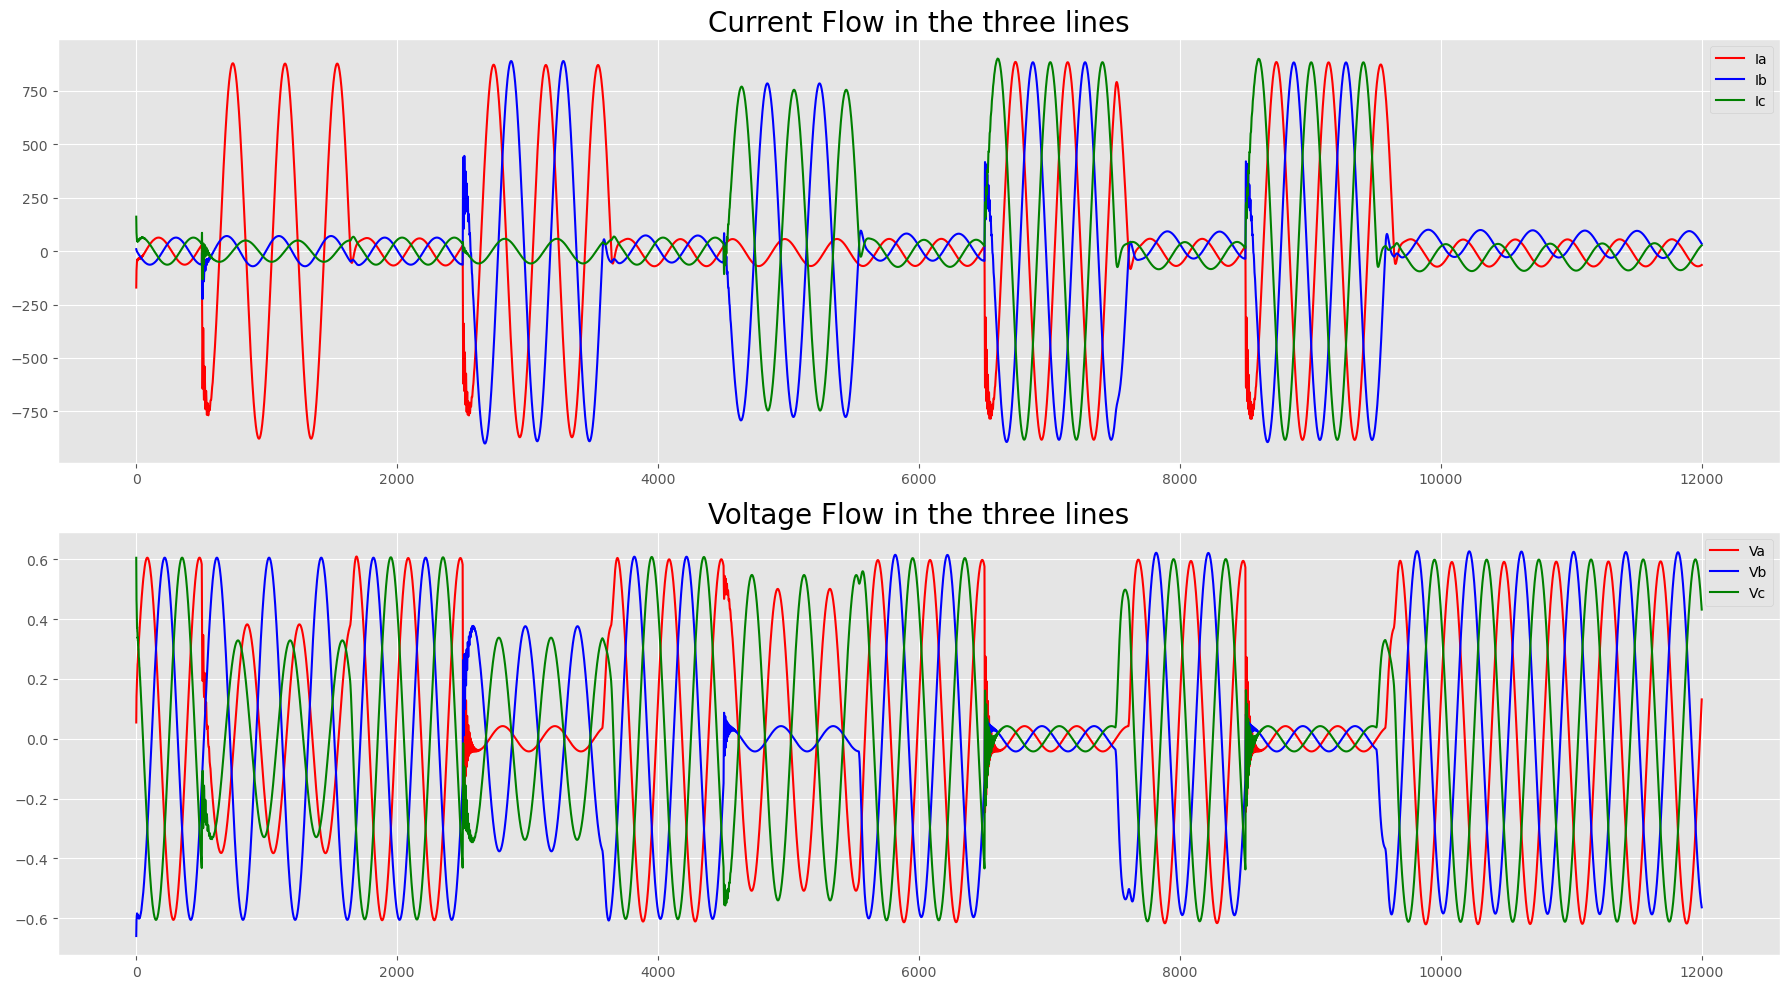

In [12]:
fig, axs = plt.subplots(2, 1, figsize=(18, 10))

axs[0].plot(detect_df_clean["Ia"], 'r', label='Ia')
axs[0].plot(detect_df_clean["Ib"], 'b', label='Ib')
axs[0].plot(detect_df_clean["Ic"], 'g', label='Ic')
axs[0].set_title('Current Flow in the three lines', fontsize=20)

axs[1].plot(detect_df_clean["Va"], 'r', label='Va')
axs[1].plot(detect_df_clean["Vb"], 'b', label='Vb')
axs[1].plot(detect_df_clean["Vc"], 'g', label='Vc')
axs[1].set_title('Voltage Flow in the three lines', fontsize=20)

for ax in axs:
    ax.legend()
    ax.grid(True)

plt.tight_layout()
plt.show()

### Insight 2

* The areas with high fluctuations of voltage and current there is an occurrence of fault there

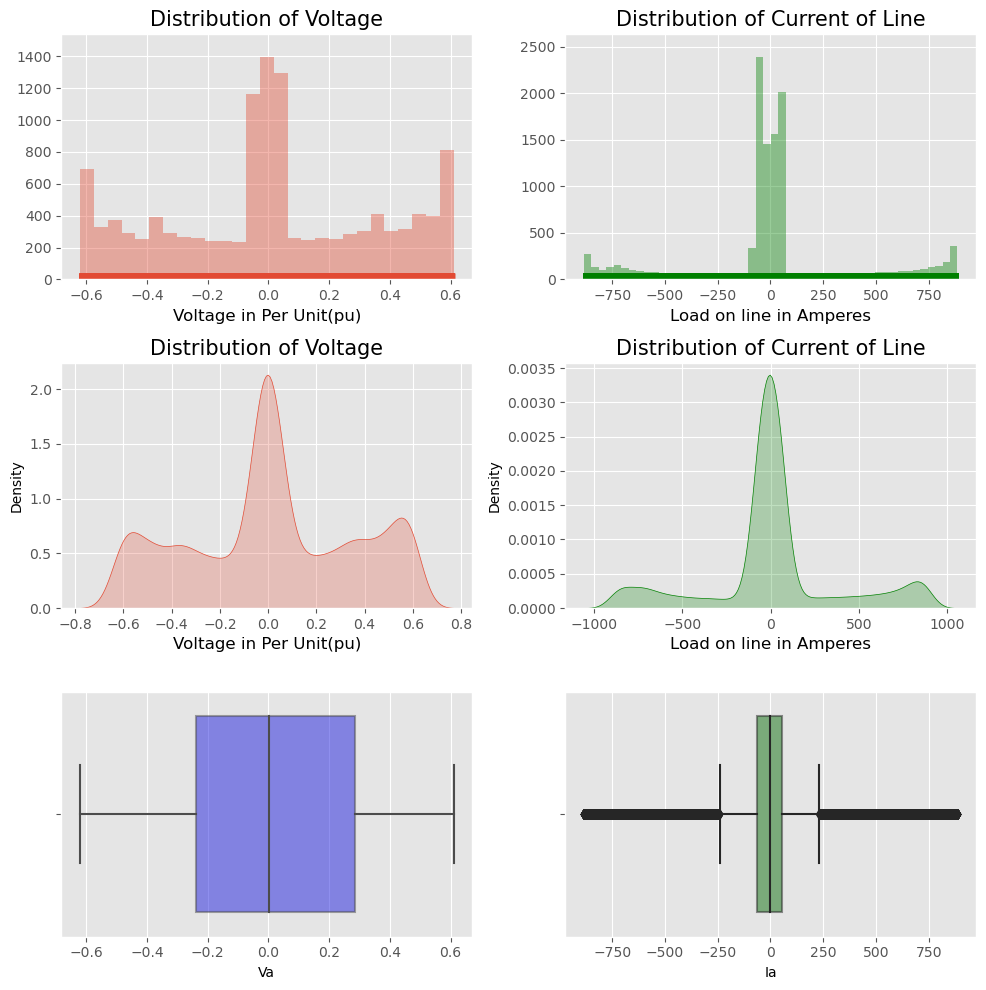

In [13]:
plt.figure(figsize= (15,10))
#plt.suptitle("Distributions of Different Features", fontsize = 20)
#Histograms
plt.subplot(3,3,1)
sns.distplot(detect_df_clean['Va'], rug = True, kde = False)
plt.xlabel('Voltage in Per Unit(pu)', fontsize = 12)
plt.title('Distribution of Voltage',fontsize = 15)

plt.subplot(3,3,2)
sns.distplot(detect_df_clean['Ia'], color= 'green',rug = True, kde = False)
plt.title('Distribution of Current of Line',fontsize = 15)
plt.xlabel('Load on line in Amperes', fontsize = 12)


#Kde Plots
plt.subplot(3,3,4)
sns.kdeplot(detect_df_clean['Va'], shade = True)
plt.xlabel('Voltage in Per Unit(pu)', fontsize = 12)
plt.title('Distribution of Voltage',fontsize = 15)

plt.subplot(3,3,5)
sns.kdeplot(detect_df_clean['Ia'], shade = True, color = 'g')
plt.title('Distribution of Current of Line',fontsize = 15)
plt.xlabel('Load on line in Amperes', fontsize = 12)


#Box Plots
plt.subplot(3,3,7)
sns.boxplot(x = detect_df_clean['Va'], orient = 'v',color= 'b', boxprops=dict(alpha=.5))
plt.subplot(3,3,8)
sns.boxplot(x = detect_df_clean['Ia'], orient = 'v', color= 'g', boxprops=dict(alpha=.5))


plt.tight_layout()
plt.show()

### Insights 3

#### For voltage distribution
* The distribution of the  voltage flow obeys the normal distribution curve
* There is no outlier from the observed dataset of the voltage flow.

#### For Current distribution
* The distribution of the current flow through the three lines flows the normal distribution curve
* There exist several datasets outside the distribution region of the dataset.


Lets check for the correlation between the variables and the output

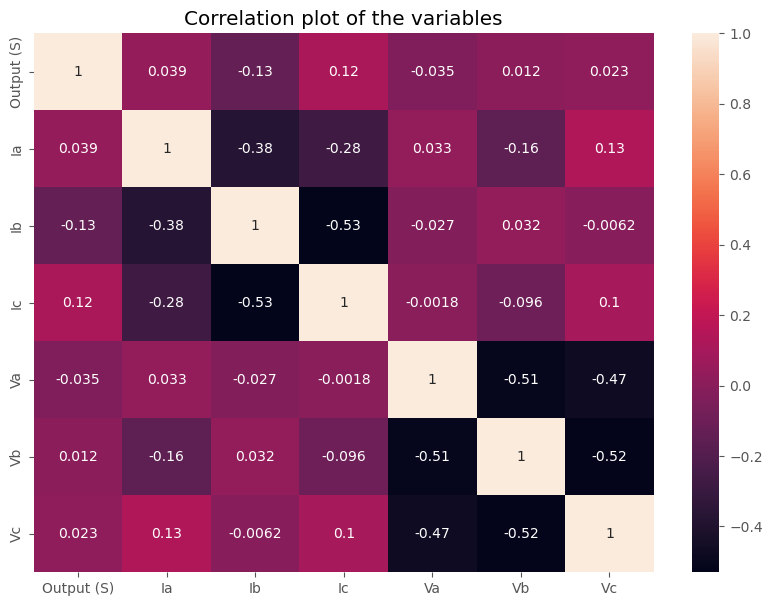

In [14]:
plt.figure(figsize=(10, 7))
sns.heatmap(detect_df_clean.corr(), annot=True)
plt.title('Correlation plot of the variables')
plt.show()

The correlation between the variables looks very poor, lets try building the LSTM model for the detection of the fault

## 5. Data Modeling

1. Fault detection 

The fault detection will be done using the LSTM model.

LSTM stands for Long Short-Term Memory, a type of recurrent neural network (RNN) architecture designed to address the vanishing gradient problem in traditional RNNs. LSTMs are particularly effective in capturing and learning dependencies or patterns in sequential data due to their ability to retain and utilize information over long periods.

The key components of an LSTM cell are the input gate, forget gate, output gate, and cell state. These gates regulate the flow of information within the LSTM unit, allowing it to learn long-term dependencies by selectively remembering or forgetting information.

#### Steps
* Separating the target variable which is the fault from the input variables which are the currents and the voltage using thhe train-test split algorithm
* Feed the datasets into the LSTM model
* Evaluate the performance of the models developed 
* Record observations and changes experienced

In [15]:
detect_df_clean.head()

,Output (S),Ia,Ib,Ic,Va,Vb,Vc
0,0,-170.472196,9.219613,161.252583,0.054490,-0.659921,0.605431
1,0,-122.235754,6.168667,116.067087,0.102000,-0.628612,0.526202
2,0,-90.161474,3.813632,86.347841,0.141026,-0.605277,0.464251
3,0,-79.904916,2.398803,77.506112,0.156272,-0.602235,0.445963
4,0,-63.885255,0.590667,63.294587,0.180451,-0.591501,0.411050


* Separating the target from the input 

In [16]:
# Separating the target from the input 
# Let X_d represent the input dataset for the detection while y_d for the output of the prediction

X_d = detect_df_clean.drop(columns=["Output (S)"]) #input variables
y_d = detect_df_clean['Output (S)'] 

print(X_d.head())

           Ia        Ib          Ic        Va        Vb        Vc
0 -170.472196  9.219613  161.252583  0.054490 -0.659921  0.605431
1 -122.235754  6.168667  116.067087  0.102000 -0.628612  0.526202
2  -90.161474  3.813632   86.347841  0.141026 -0.605277  0.464251
3  -79.904916  2.398803   77.506112  0.156272 -0.602235  0.445963
4  -63.885255  0.590667   63.294587  0.180451 -0.591501  0.411050


In [17]:
y_d.head() #Target variablbe 

0    0
1    0
2    0
3    0
4    0
Name: Output (S), dtype: int64

In [18]:
y_d.tail()

11996    0
11997    0
11998    0
11999    0
12000    0
Name: Output (S), dtype: int64

In [19]:
# Lets see the unique values in the target variable
len(set(y_d))

2

* Splitting the dataset into train and test dataset

In [20]:
X_d.shape

(12001, 6)

In [21]:
# import of the library reqired for the split
from sklearn.model_selection import train_test_split

X_dtrain, X_dtest, y_dtrain, y_dtest = train_test_split(X_d, y_d, test_size=0.3, random_state=40)

In [22]:
X_dtrain.shape

(8400, 6)

In [23]:
X_dtest.shape

(3601, 6)

In [24]:
y_dtrain.shape

(8400,)

In [25]:
y_dtest.shape

(3601,)

* LSTM modeling

In [26]:
X_d.shape[0]

12001

In [27]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import StandardScaler
import tensorflow as tf


# Normalize the data (important for LSTM)
scaler = StandardScaler()
X_dtrain_normalized = scaler.fit_transform(X_dtrain)


# Building the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_dtrain_normalized.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))

# Compiling the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

# Training the model
model.fit(X_dtrain_normalized, y_dtrain, epochs=15, batch_size=32)

# Making predictions on the test set
# Normalize the test set similarly as done for the training set
X_dtest_normalized = scaler.transform(X_dtest)


# Predicting
predictions = model.predict(X_dtest_normalized)

# Evaluate your model
model.evaluate(X_dtest_normalized, y_dtest)

# Visualize the model architecture
#tf.keras.utils.plot_model(model, show_shapes=True)




Epoch 1/15


263/263 [==============================] - 6s 12ms/step - loss: 0.1084 - accuracy: 0.8695
Epoch 2/15
263/263 [==============================] - 3s 12ms/step - loss: 0.0418 - accuracy: 0.9579
Epoch 3/15
263/263 [==============================] - 3s 11ms/step - loss: 0.0280 - accuracy: 0.9726
Epoch 4/15
263/263 [==============================] - 3s 10ms/step - loss: 0.0188 - accuracy: 0.9802
Epoch 5/15
263/263 [==============================] - 2s 7ms/step - loss: 0.0174 - accuracy: 0.9829
Epoch 6/15
263/263 [==============================] - 2s 8ms/step - loss: 0.0158 - accuracy: 0.9838
Epoch 7/15
263/263 [==============================] - 2s 9ms/step - loss: 0.0142 - accuracy: 0.9846
Epoch 8/15
263/263 [==============================] - 2s 9ms/step - loss: 0.0126 - accuracy: 0.9862
Epoch 9/15
263/263 [==============================] - 2s 9ms/step - loss: 0.0121 - accuracy: 0.9867
Epoch 10/15
263/263 [==============================] - 2s 9ms/step - loss: 0.0104 - accurac

[0.007831388153135777, 0.9913913011550903]

In [28]:
! pip install pydot --upgrade

In [29]:
! pip install graphviz --upgrade

## Part 2: Fault Category Classification

There are 5 major fault which occurs here in this dataset

They are;
1. Line A Line B to Ground Fault
2. Line A Line B Line C to Ground Fault 
3. Line A to Ground Fault                 
4. Line A Line B Line C                    
5. Line B to Line C Fault
6. No fault

We want to classify these faults into different categories

In [30]:
class_data().head()

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc
0,1,0,0,1,-151.291812,-9.677452,85.800162,0.400750,-0.132935,-0.267815
1,1,0,0,1,-336.186183,-76.283262,18.328897,0.312732,-0.123633,-0.189099
2,1,0,0,1,-502.891583,-174.648023,-80.924663,0.265728,-0.114301,-0.151428
3,1,0,0,1,-593.941905,-217.703359,-124.891924,0.235511,-0.104940,-0.130570
4,1,0,0,1,-643.663617,-224.159427,-132.282815,0.209537,-0.095554,-0.113983


In [31]:
class_data().describe()

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc
count,7861.000000,7861.000000,7861.000000,7861.000000,7861.000000,7861.000000,7861.000000,7861.000000,7861.000000,7861.000000
mean,0.432006,0.411271,0.555527,0.571429,13.721194,-44.845268,34.392394,-0.007667,0.001152,0.006515
std,0.495387,0.492095,0.496939,0.494903,464.741671,439.269195,371.107412,0.289150,0.313437,0.307897
min,0.000000,0.000000,0.000000,0.000000,-883.542316,-900.526951,-883.357762,-0.620748,-0.608016,-0.612709
25%,0.000000,0.000000,0.000000,0.000000,-119.802518,-271.845947,-61.034219,-0.130287,-0.159507,-0.215977
50%,0.000000,0.000000,1.000000,1.000000,2.042805,5.513317,-4.326711,-0.005290,0.001620,0.009281
75%,1.000000,1.000000,1.000000,1.000000,227.246377,91.194282,49.115141,0.111627,0.153507,0.239973
max,1.000000,1.000000,1.000000,1.000000,885.738571,889.868884,901.274261,0.595342,0.627875,0.600179


In [32]:
class_df = class_data()

In [33]:
class_df.head()

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc
0,1,0,0,1,-151.291812,-9.677452,85.800162,0.400750,-0.132935,-0.267815
1,1,0,0,1,-336.186183,-76.283262,18.328897,0.312732,-0.123633,-0.189099
2,1,0,0,1,-502.891583,-174.648023,-80.924663,0.265728,-0.114301,-0.151428
3,1,0,0,1,-593.941905,-217.703359,-124.891924,0.235511,-0.104940,-0.130570
4,1,0,0,1,-643.663617,-224.159427,-132.282815,0.209537,-0.095554,-0.113983


* Creating a column for the type of fault code

In [34]:
class_df['Fault_Type'] = class_df['G'].astype('str') + class_df['C'].astype('str') + class_df['B'].astype('str') + class_df['A'].astype('str')
class_df.head().style.set_properties(**{'background-color': 'blue',
                           'color': 'white',
                           'border-color': 'darkblack'})

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc,Fault_Type
0,1,0,0,1,-151.291812,-9.677452,85.800162,0.400750,-0.132935,-0.267815,1001
1,1,0,0,1,-336.186183,-76.283262,18.328897,0.312732,-0.123633,-0.189099,1001
2,1,0,0,1,-502.891583,-174.648023,-80.924663,0.265728,-0.114301,-0.151428,1001
3,1,0,0,1,-593.941905,-217.703359,-124.891924,0.235511,-0.104940,-0.130570,1001
4,1,0,0,1,-643.663617,-224.159427,-132.282815,0.209537,-0.095554,-0.113983,1001


* Replacing the code by the type of fault which was experienced

1. No fault = [0000]
2. Line A to Ground Fault
3. Line B to Line C Fault 
4. Line A Line B to Ground Fault 
5. Line A Line B Line C Fault 
6. Line A Line B Line C to Ground Fault

There are 6 classes of faults which are likely to occur during the course of transmission of power through the power lines

In [35]:
class_df['Fault_Type'][class_df['Fault_Type'] == '0000' ] = 'NO Fault'
class_df['Fault_Type'][class_df['Fault_Type'] == '1001' ] = 'Line A to Ground Fault'
class_df['Fault_Type'][class_df['Fault_Type'] == '0110' ] = 'Line B to Line C Fault'
class_df['Fault_Type'][class_df['Fault_Type'] == '1011' ] = 'Line A Line B to Ground Fault'
class_df['Fault_Type'][class_df['Fault_Type'] == '0111' ] = 'Line A Line B Line C'
class_df['Fault_Type'][class_df['Fault_Type'] == '1111' ] = 'Line A Line B Line C to Ground Fault'

In [36]:
class_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7861 entries, 0 to 7860
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   G           7861 non-null   int64  
 1   C           7861 non-null   int64  
 2   B           7861 non-null   int64  
 3   A           7861 non-null   int64  
 4   Ia          7861 non-null   float64
 5   Ib          7861 non-null   float64
 6   Ic          7861 non-null   float64
 7   Va          7861 non-null   float64
 8   Vb          7861 non-null   float64
 9   Vc          7861 non-null   float64
 10  Fault_Type  7861 non-null   object 
dtypes: float64(6), int64(4), object(1)
memory usage: 675.7+ KB


In [37]:
class_df.head()

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc,Fault_Type
0,1,0,0,1,-151.291812,-9.677452,85.800162,0.400750,-0.132935,-0.267815,Line A to Ground Fault
1,1,0,0,1,-336.186183,-76.283262,18.328897,0.312732,-0.123633,-0.189099,Line A to Ground Fault
2,1,0,0,1,-502.891583,-174.648023,-80.924663,0.265728,-0.114301,-0.151428,Line A to Ground Fault
3,1,0,0,1,-593.941905,-217.703359,-124.891924,0.235511,-0.104940,-0.130570,Line A to Ground Fault
4,1,0,0,1,-643.663617,-224.159427,-132.282815,0.209537,-0.095554,-0.113983,Line A to Ground Fault


* Let's examine the number of faults each fault type is likely to experience from this dataset

In [38]:
print('Fault Type                         Number count')
print('-------------------------------------------------')

class_df['Fault_Type'].value_counts(ascending=False)

Fault Type                         Number count
-------------------------------------------------


NO Fault                                2365
Line A Line B to Ground Fault           1134
Line A Line B Line C to Ground Fault    1133
Line A to Ground Fault                  1129
Line A Line B Line C                    1096
Line B to Line C Fault                  1004
Name: Fault_Type, dtype: int64

The observation with no fault record the highest count.

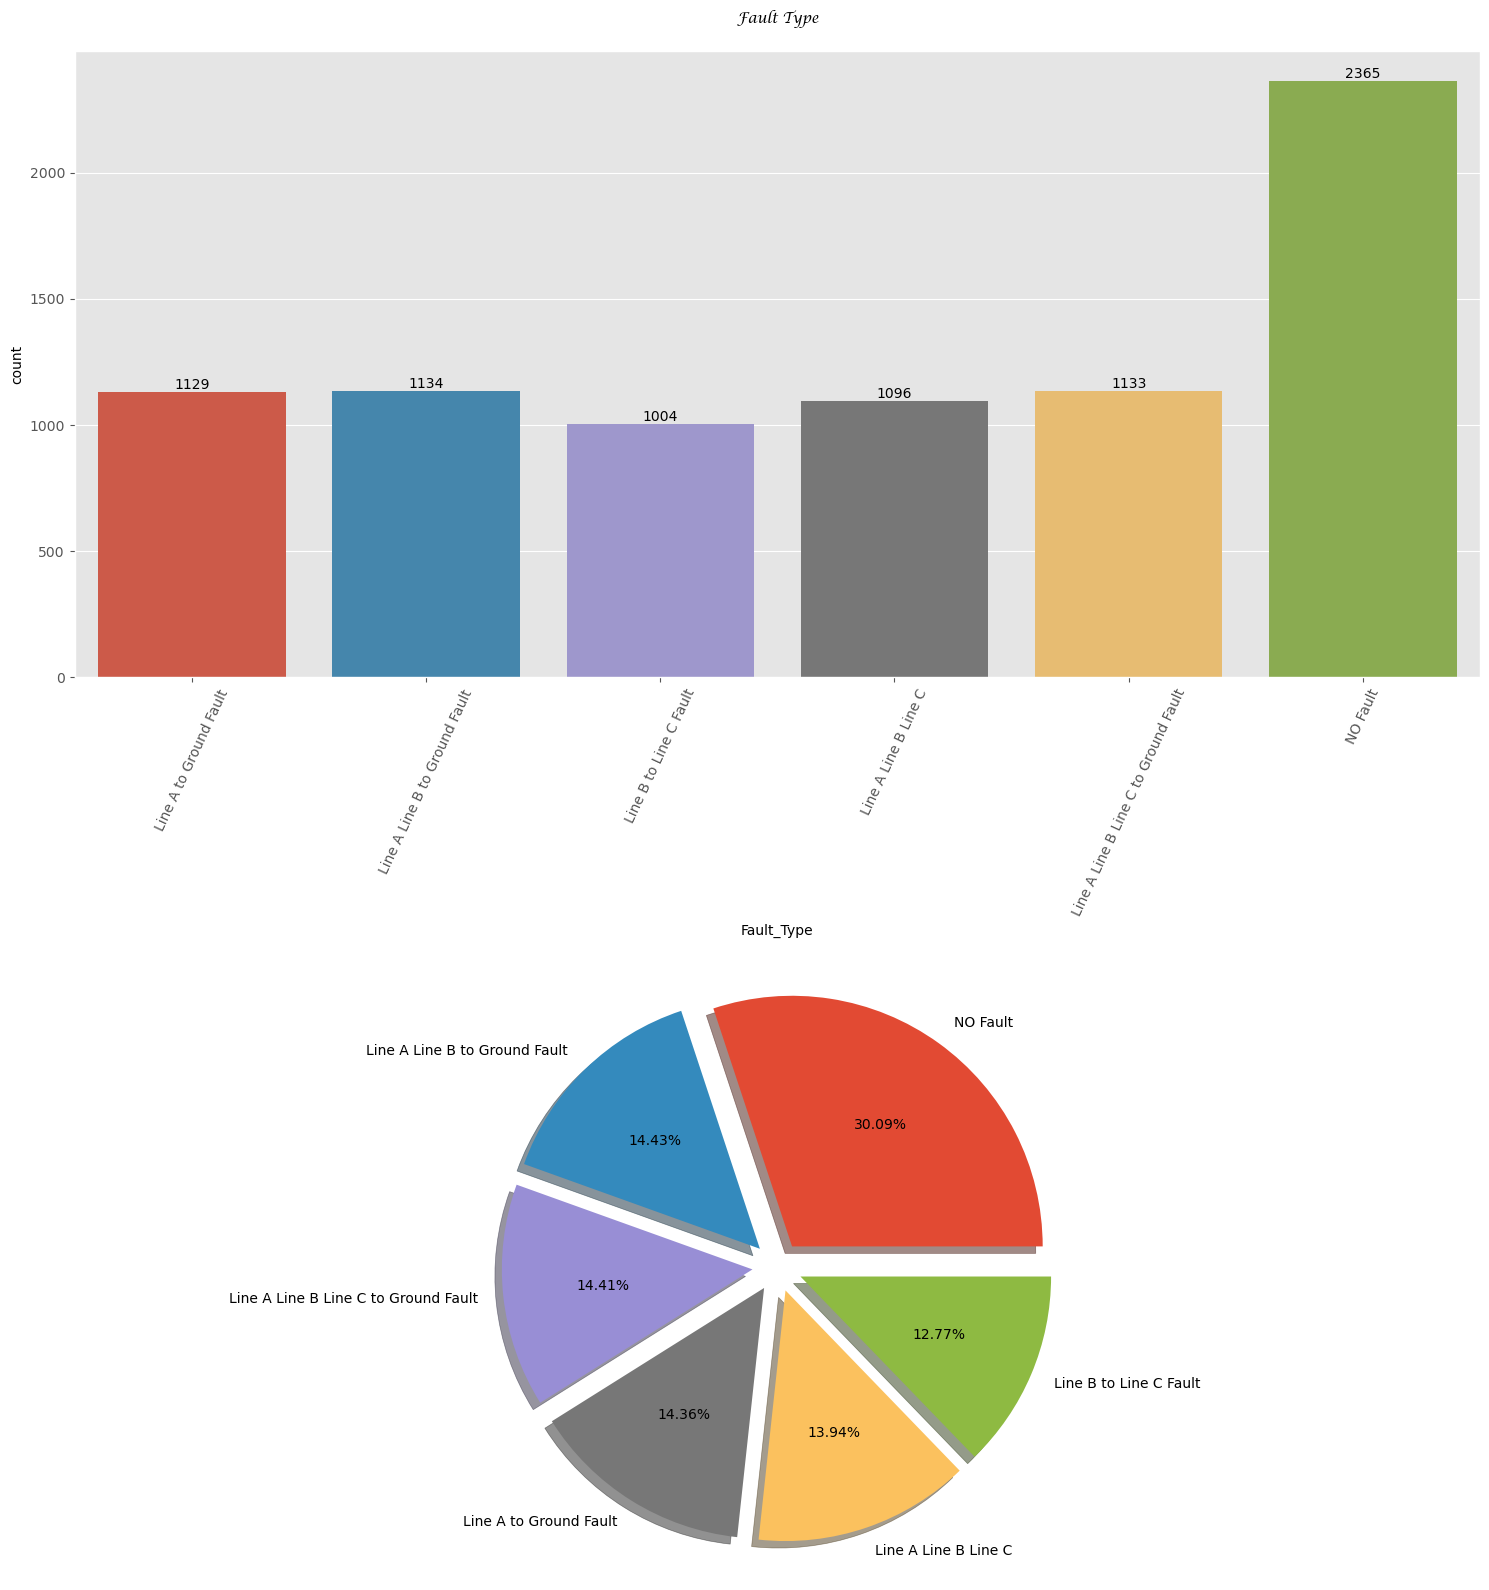

In [39]:
ax = plt.figure(figsize = (15,16))
ax = plt.subplot(2,1,1)
ax = sns.countplot(x='Fault_Type', data=class_df)
ax.bar_label(ax.containers[0])
plt.title("Fault Type", fontsize=30, color = 'Black', font='Lucida Calligraphy',pad=20)
plt.xticks(rotation=65)
plt.tight_layout()

ax =plt.subplot(2,1,2)
ax=class_df['Fault_Type'].value_counts().plot.pie(explode=[0.1, 0.1,0.1,0.1, 0.1,0.1],autopct='%1.2f%%',shadow=True);
plt.tight_layout()
plt.axis('off');

#### Seperating the faults into categories

1. No Fault (Healthy Transmission System)

In [40]:
No_Fault = class_df[class_df['Fault_Type'] == 'NO Fault' ]

No_Fault.head()

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc,Fault_Type
5496,0,0,0,0,61.806321,-22.861987,21.102428,0.366320,-0.567179,0.200859,NO Fault
5497,0,0,0,0,48.041678,-23.401108,21.273066,0.367341,-0.564257,0.196916,NO Fault
5498,0,0,0,0,34.256533,-23.909263,21.408047,0.368258,-0.561168,0.192910,NO Fault
5499,0,0,0,0,20.464350,-24.396165,21.501503,0.369086,-0.557916,0.188830,NO Fault
5500,0,0,0,0,7.109677,-25.075888,21.341967,0.370321,-0.554505,0.184184,NO Fault


* Visualizing to see the nature of flow of transmission

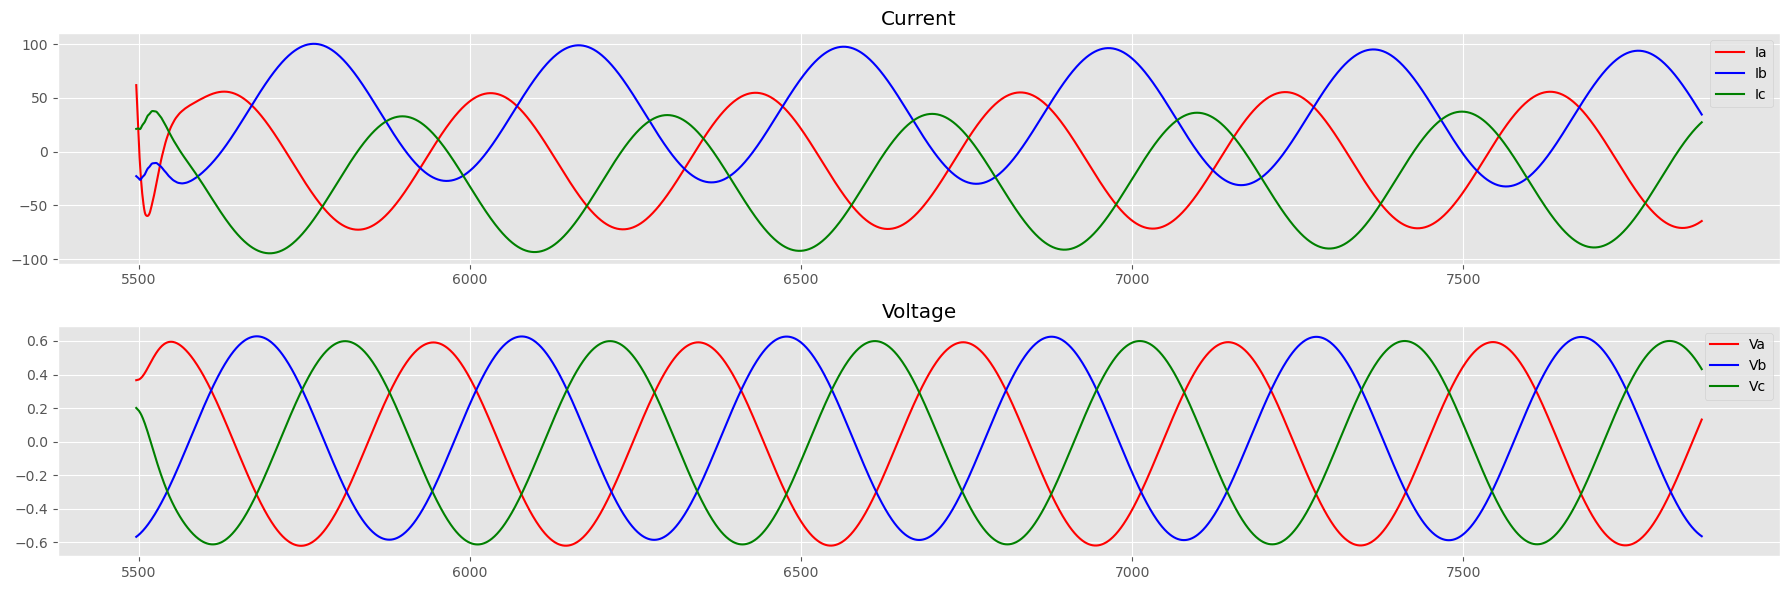

In [41]:
fig, axs = plt.subplots(2, 1, figsize=(18, 6))

axs[0].plot(No_Fault["Ia"], 'r', label='Ia')
axs[0].plot(No_Fault["Ib"], 'b', label='Ib')
axs[0].plot(No_Fault["Ic"], 'g', label='Ic')
axs[0].set_title('Current')

axs[1].plot(No_Fault["Va"], 'r', label='Va')
axs[1].plot(No_Fault["Vb"], 'b', label='Vb')
axs[1].plot(No_Fault["Vc"], 'g', label='Vc')
axs[1].set_title('Voltage')

for ax in axs:
    ax.legend()
    ax.grid(True)

plt.tight_layout()
plt.show()

* In a normal (No_Fault) condition Voltage or Current graph, is symmetrical and sinusoidal in nature with current and voltage 120 degree in phase shift and maximum current is approximately +100 to -100 Amperes and voltage +0.5 pu to -0.5pu
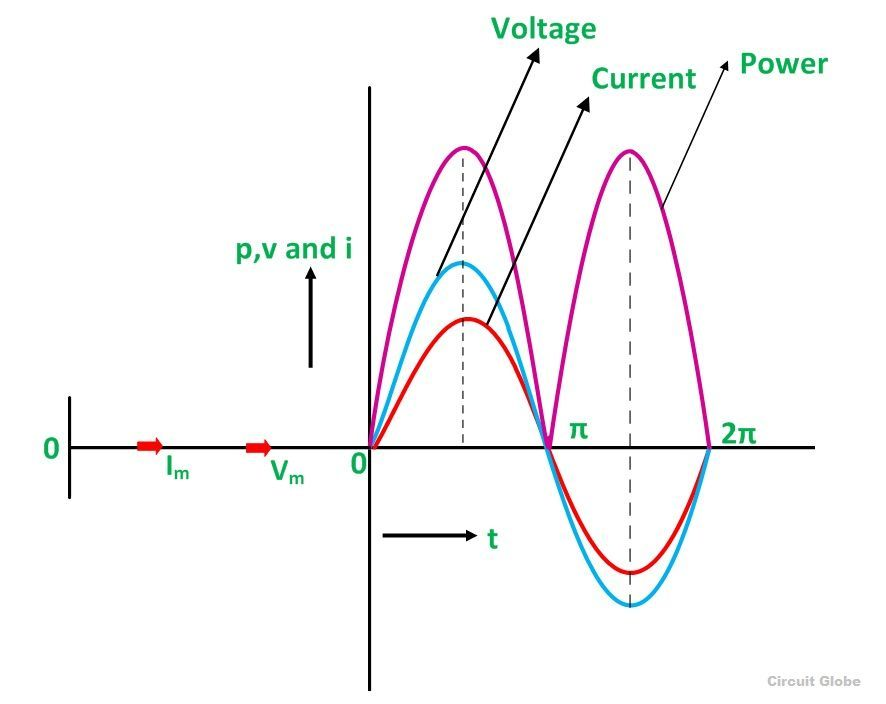

2. Faulty System with Line A to Ground Fault

Let's observe the flow of current and voltage through the three lines

In [42]:
Line_AG_Fault = class_df[class_df['Fault_Type'] == 'Line A to Ground Fault' ]

Line_AG_Fault.head()

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc,Fault_Type
0,1,0,0,1,-151.291812,-9.677452,85.800162,0.400750,-0.132935,-0.267815,Line A to Ground Fault
1,1,0,0,1,-336.186183,-76.283262,18.328897,0.312732,-0.123633,-0.189099,Line A to Ground Fault
2,1,0,0,1,-502.891583,-174.648023,-80.924663,0.265728,-0.114301,-0.151428,Line A to Ground Fault
3,1,0,0,1,-593.941905,-217.703359,-124.891924,0.235511,-0.104940,-0.130570,Line A to Ground Fault
4,1,0,0,1,-643.663617,-224.159427,-132.282815,0.209537,-0.095554,-0.113983,Line A to Ground Fault


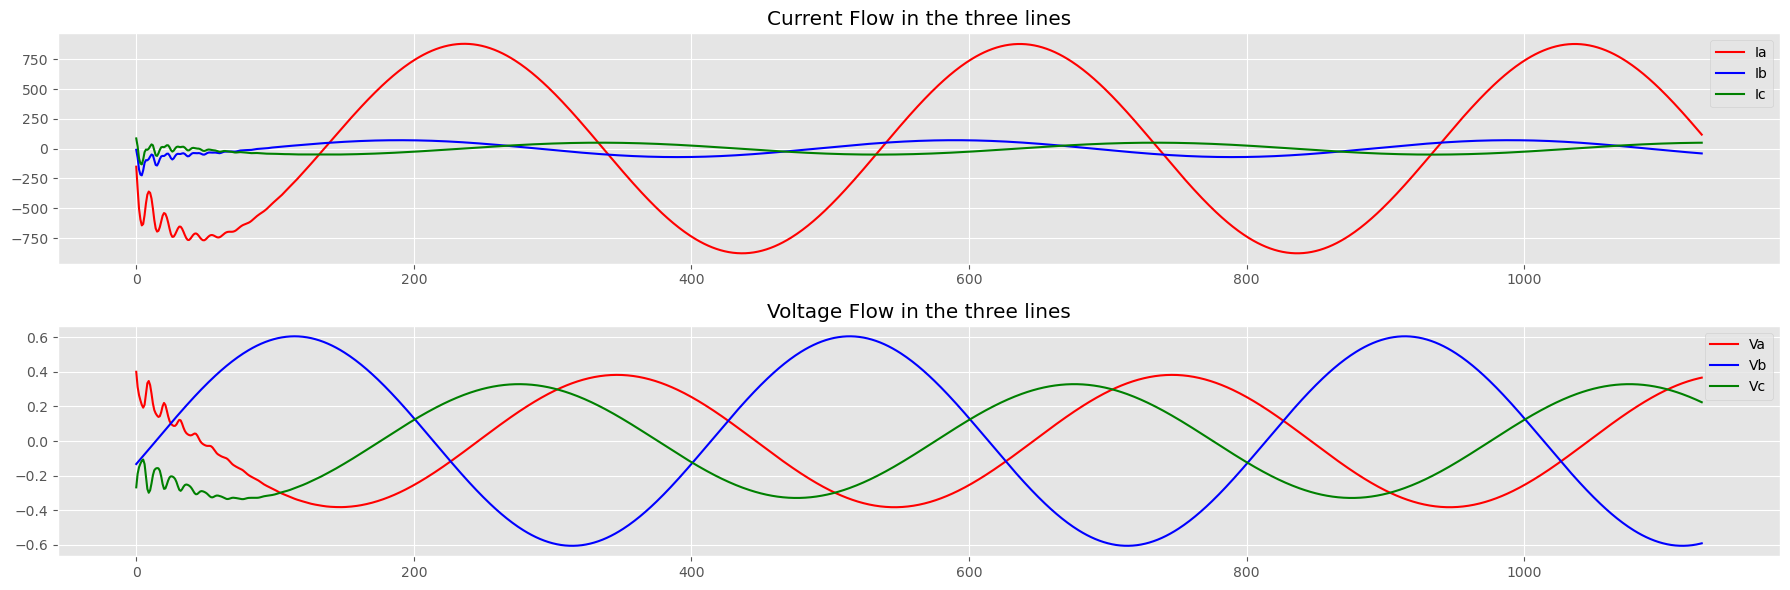

In [43]:
fig, axs = plt.subplots(2, 1, figsize=(18, 6))

axs[0].plot(Line_AG_Fault["Ia"], 'r', label='Ia')
axs[0].plot(Line_AG_Fault["Ib"], 'b', label='Ib')
axs[0].plot(Line_AG_Fault["Ic"], 'g', label='Ic')
axs[0].set_title('Current Flow in the three lines')

axs[1].plot(Line_AG_Fault["Va"], 'r', label='Va')
axs[1].plot(Line_AG_Fault["Vb"], 'b', label='Vb')
axs[1].plot(Line_AG_Fault["Vc"], 'g', label='Vc')
axs[1].set_title('Voltage Flow in the three lines')

for ax in axs:
    ax.legend()
    ax.grid(True)

plt.tight_layout()
plt.show()

At a time of Line A to grounf fault the current in line A increases to 10 fold approximately 1000 Ampears form normal 100 Ampears and voltage reduced.


3. Faulty System with Line A ,Line B to Ground Fault

In [44]:
# Extracting the line A, Line B to Ground Fault 

Line_ABG_Fault = class_df[class_df['Fault_Type'] == 'Line A Line B to Ground Fault' ]

Line_ABG_Fault.head()

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc,Fault_Type
1129,1,0,1,1,-83.713374,42.102812,38.015631,0.416930,-0.066439,-0.350491,Line A Line B to Ground Fault
1130,1,0,1,1,-304.258650,243.536374,42.670680,0.097053,0.089765,-0.186818,Line A Line B to Ground Fault
1131,1,0,1,1,-487.104324,377.325956,29.573282,-0.132447,0.203226,-0.070779,Line A Line B to Ground Fault
1132,1,0,1,1,-603.543045,439.399623,9.638569,-0.248609,0.263483,-0.014873,Line A Line B to Ground Fault
1133,1,0,1,1,-620.718849,423.222790,0.613787,-0.226918,0.254651,-0.027733,Line A Line B to Ground Fault


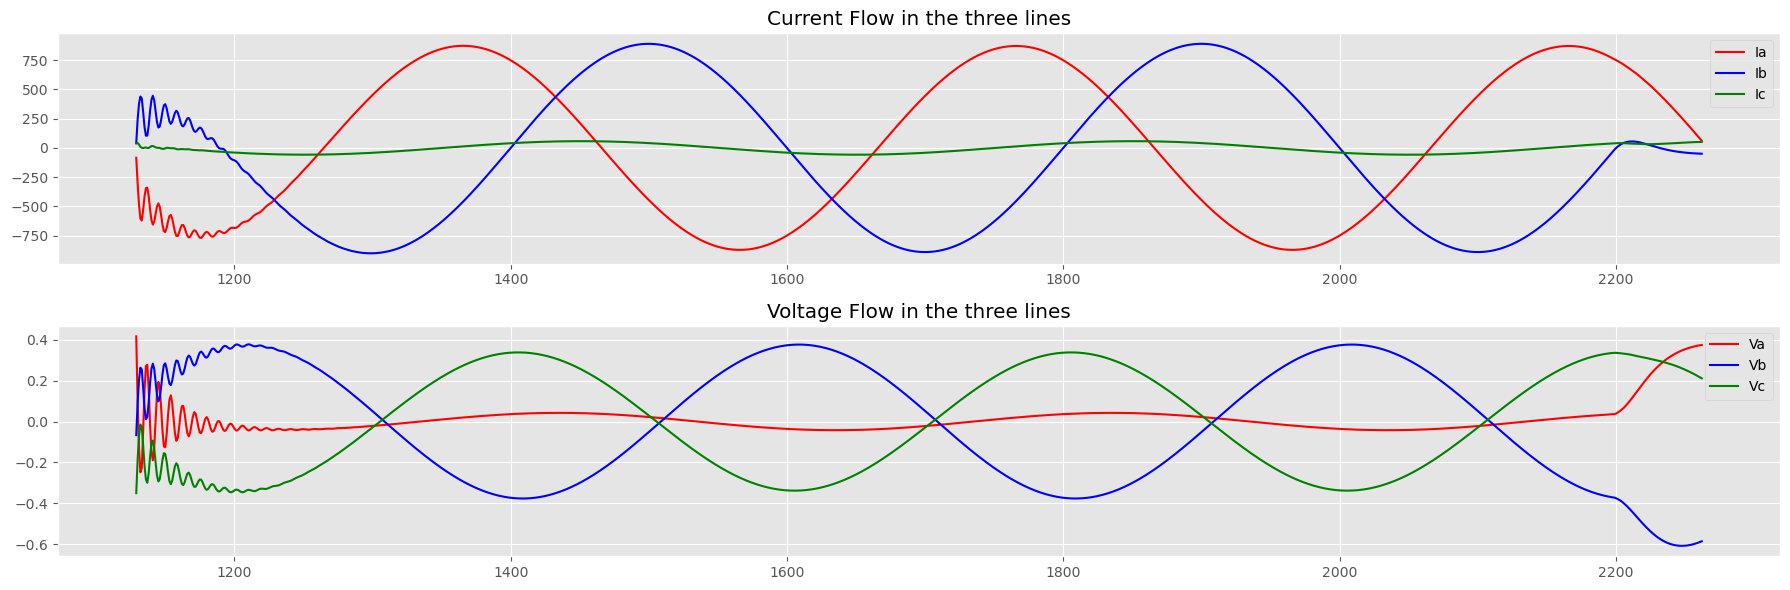

In [45]:
fig, axs = plt.subplots(2, 1, figsize=(18, 6))

axs[0].plot(Line_ABG_Fault["Ia"], 'r', label='Ia')
axs[0].plot(Line_ABG_Fault["Ib"], 'b', label='Ib')
axs[0].plot(Line_ABG_Fault["Ic"], 'g', label='Ic')
axs[0].set_title('Current Flow in the three lines')

axs[1].plot(Line_ABG_Fault["Va"], 'r', label='Va')
axs[1].plot(Line_ABG_Fault["Vb"], 'b', label='Vb')
axs[1].plot(Line_ABG_Fault["Vc"], 'g', label='Vc')
axs[1].set_title('Voltage Flow in the three lines')

for ax in axs:
    ax.legend()
    ax.grid(True)

plt.tight_layout()
plt.show()

4. Faulty System with Line B to Line C


In [46]:
Line_BC_Fault = class_df[class_df['Fault_Type'] == 'Line B to Line C Fault' ]

Line_BC_Fault.head()

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc,Fault_Type
2263,0,1,1,0,41.764455,-93.940215,55.022192,0.517510,-0.003685,-0.513825,Line B to Line C Fault
2264,0,1,1,0,42.394348,-105.038998,65.494029,0.518491,-0.008071,-0.510420,Line B to Line C Fault
2265,0,1,1,0,43.010571,-105.734383,65.569977,0.511217,0.003798,-0.515015,Line B to Line C Fault
2266,0,1,1,0,43.612456,-100.121739,59.347319,0.499096,0.025105,-0.524201,Line B to Line C Fault
2267,0,1,1,0,44.202230,-95.078643,53.707382,0.487527,0.045052,-0.532579,Line B to Line C Fault


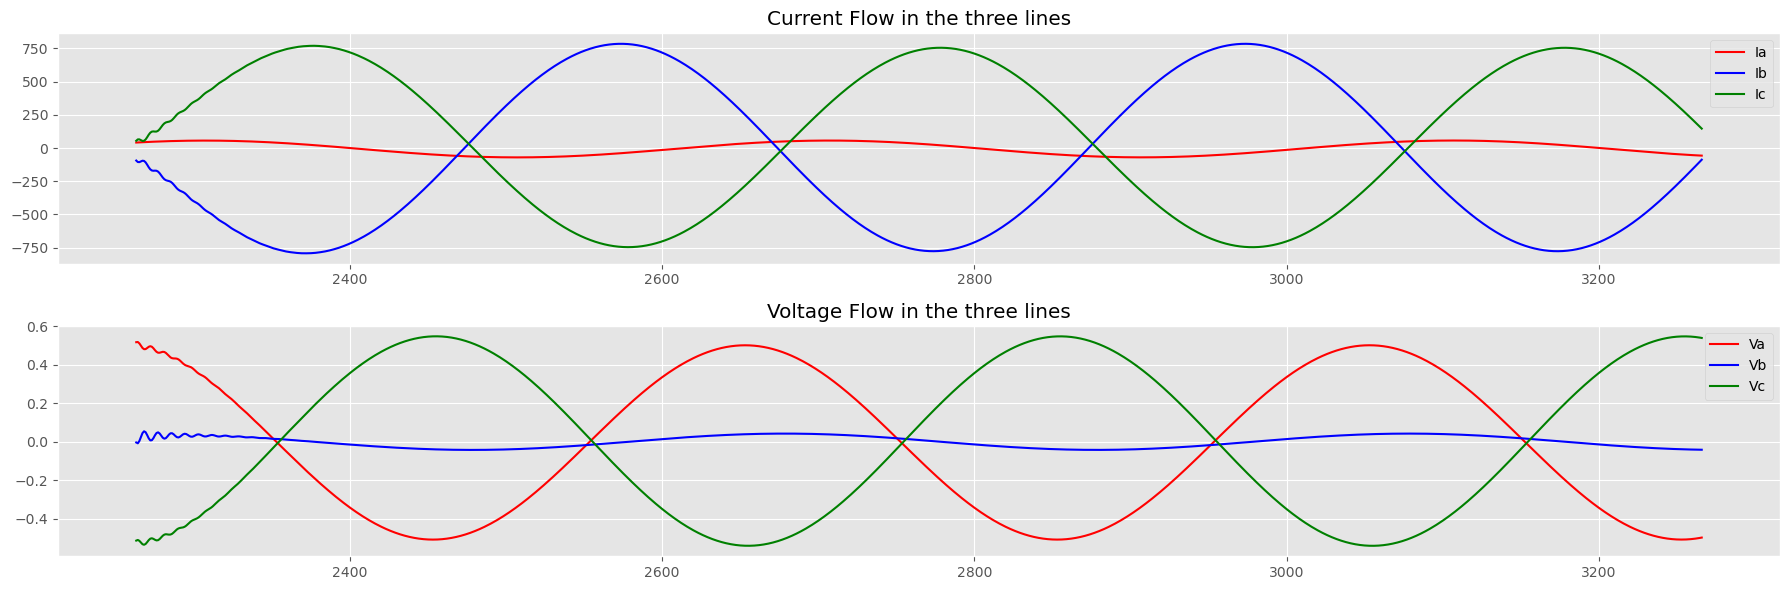

In [47]:
fig, axs = plt.subplots(2, 1, figsize=(18, 6))

axs[0].plot(Line_BC_Fault["Ia"], 'r', label='Ia')
axs[0].plot(Line_BC_Fault["Ib"], 'b', label='Ib')
axs[0].plot(Line_BC_Fault["Ic"], 'g', label='Ic')
axs[0].set_title('Current Flow in the three lines')

axs[1].plot(Line_BC_Fault["Va"], 'r', label='Va')
axs[1].plot(Line_BC_Fault["Vb"], 'b', label='Vb')
axs[1].plot(Line_BC_Fault["Vc"], 'g', label='Vc')
axs[1].set_title('Voltage Flow in the three lines')

for ax in axs:
    ax.legend()
    ax.grid(True)

plt.tight_layout()
plt.show()

5. Faulty System with Line A - Line B - Line C

In [48]:
Line_ABC_Fault = class_df[class_df['Fault_Type'] == 'Line A Line B Line C' ]

Line_ABC_Fault.head()

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc,Fault_Type
3267,0,1,1,1,-99.274309,44.146905,57.318650,0.412305,-0.091525,-0.320781,Line A Line B Line C
3268,0,1,1,1,-342.196277,218.566556,125.820753,0.095905,-0.003471,-0.092434,Line A Line B Line C
3269,0,1,1,1,-526.696029,347.197345,181.689494,-0.131094,0.056790,0.074304,Line A Line B Line C
3270,0,1,1,1,-633.453623,416.942091,218.702118,-0.245984,0.084683,0.161301,Line A Line B Line C
3271,0,1,1,1,-639.192926,412.122656,229.260639,-0.224523,0.075580,0.148943,Line A Line B Line C


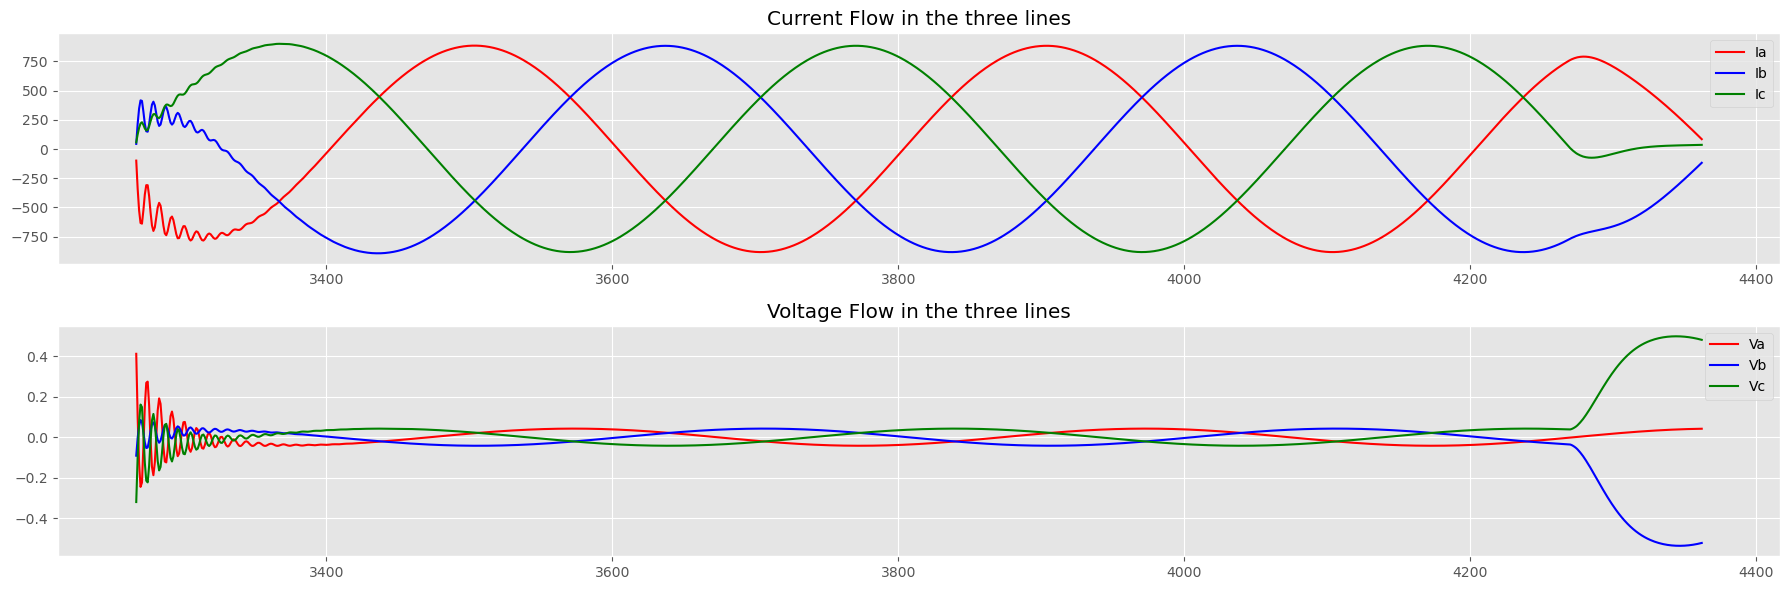

In [49]:
fig, axs = plt.subplots(2, 1, figsize=(18, 6))

axs[0].plot(Line_ABC_Fault["Ia"], 'r', label='Ia')
axs[0].plot(Line_ABC_Fault["Ib"], 'b', label='Ib')
axs[0].plot(Line_ABC_Fault["Ic"], 'g', label='Ic')
axs[0].set_title('Current Flow in the three lines')

axs[1].plot(Line_ABC_Fault["Va"], 'r', label='Va')
axs[1].plot(Line_ABC_Fault["Vb"], 'b', label='Vb')
axs[1].plot(Line_ABC_Fault["Vc"], 'g', label='Vc')
axs[1].set_title('Voltage Flow in the three lines')

for ax in axs:
    ax.legend()
    ax.grid(True)

plt.tight_layout()
plt.show()

There exist severe fault in the transmission of voltage which could be as a result of several factors.

6. Faulty System with Line A - Line B - Line C - Ground

In [50]:
Line_ABCG_Fault = class_df[class_df['Fault_Type'] == 'Line A Line B Line C to Ground Fault' ]

Line_ABCG_Fault.head()

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc,Fault_Type
4363,1,1,1,1,-99.252463,52.717974,48.341534,0.410059,-0.086914,-0.323145,Line A Line B Line C to Ground Fault
4364,1,1,1,1,-342.238819,224.821345,119.149604,0.095347,-0.002326,-0.093021,Line A Line B Line C to Ground Fault
4365,1,1,1,1,-526.874012,351.614759,176.674369,-0.130437,0.055441,0.074996,Line A Line B Line C to Ground Fault
4366,1,1,1,1,-633.768916,420.246089,214.577137,-0.244709,0.082066,0.162643,Line A Line B Line C to Ground Fault
4367,1,1,1,1,-639.566896,415.329565,225.117414,-0.223359,0.073192,0.150167,Line A Line B Line C to Ground Fault


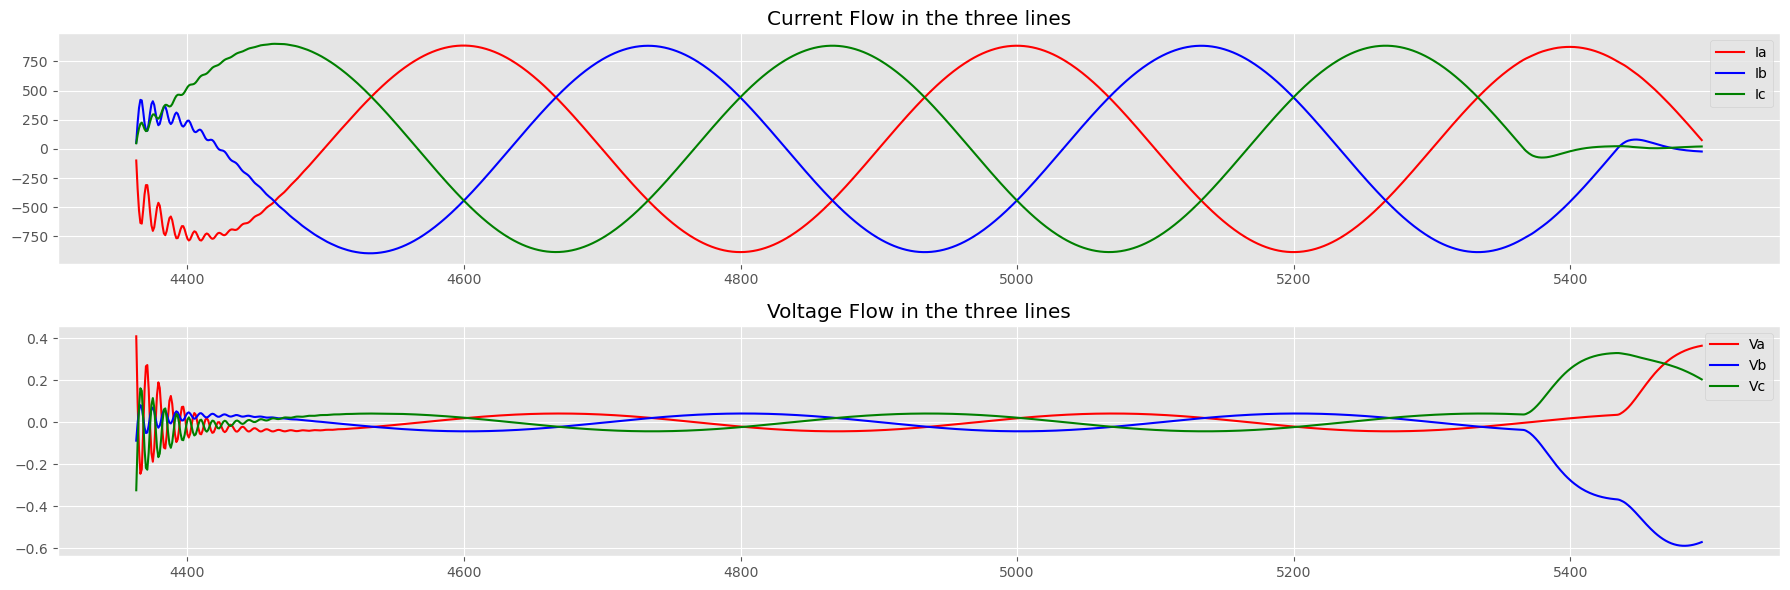

In [51]:
fig, axs = plt.subplots(2, 1, figsize=(18, 6))

axs[0].plot(Line_ABCG_Fault["Ia"], 'r', label='Ia')
axs[0].plot(Line_ABCG_Fault["Ib"], 'b', label='Ib')
axs[0].plot(Line_ABCG_Fault["Ic"], 'g', label='Ic')
axs[0].set_title('Current Flow in the three lines')

axs[1].plot(Line_ABCG_Fault["Va"], 'r', label='Va')
axs[1].plot(Line_ABCG_Fault["Vb"], 'b', label='Vb')
axs[1].plot(Line_ABCG_Fault["Vc"], 'g', label='Vc')
axs[1].set_title('Voltage Flow in the three lines')

for ax in axs:
    ax.legend()
    ax.grid(True)

plt.tight_layout()
plt.show()

There exist severe fault in the transmission of voltage which could be as a result of several factors.

#### Feature and Label seperation

Conversion of Categorical observations to a numerical observation

In [52]:
# Import of the encoder from the sklearn library
from sklearn.preprocessing import LabelEncoder

# Initializing the encoder
encoder = LabelEncoder()

# Reintialize the fault type category to the numerical data
class_df['Fault_Type'] = encoder.fit_transform(class_df['Fault_Type'])

# Viewing the first five rows of the transformed dataset
class_df.head()

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc,Fault_Type
0,1,0,0,1,-151.291812,-9.677452,85.800162,0.400750,-0.132935,-0.267815,3
1,1,0,0,1,-336.186183,-76.283262,18.328897,0.312732,-0.123633,-0.189099,3
2,1,0,0,1,-502.891583,-174.648023,-80.924663,0.265728,-0.114301,-0.151428,3
3,1,0,0,1,-593.941905,-217.703359,-124.891924,0.235511,-0.104940,-0.130570,3
4,1,0,0,1,-643.663617,-224.159427,-132.282815,0.209537,-0.095554,-0.113983,3


Successfully encoded the fault category to numerical 

#### Dependent and Independent Variable Separation


In [53]:
X = class_df.drop(['Fault_Type'],axis=1)

y = class_df['Fault_Type']

#### Train Test Split

In [54]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.20,random_state=21)

In [55]:
from sklearn.neural_network import MLPClassifier

# Build the MLP model for classification
mlp_classifier = MLPClassifier(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', random_state=1)
mlp_classifier.fit(X_train, y_train)

# Evaluate the model
train_score = mlp_classifier.score(X_train, y_train)
test_score = mlp_classifier.score(X_test, y_test)

print(f"Train Score: {train_score}")
print(f"Test Score: {test_score}")


Train Score: 0.936704834605598
Test Score: 0.9332485696122059
